In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df=pd.read_csv('/content/Credit_Data.csv')
df

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [144]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [145]:
df.describe()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,1.582000,20.903000,2.219000,3.620000,3271.258000,1.730000,1.620000,2.973000,1.878000,...,2.845000,1.358000,35.546000,0.908000,1.071000,1.407000,1.274000,1.155000,0.404000,0.963000
std,0.458487,1.253334,12.058814,1.064035,2.165246,2822.736876,1.232322,1.209571,1.118715,1.350904,...,1.103718,1.001418,11.375469,0.421561,0.531264,0.577654,0.946478,0.362086,0.490943,0.188856
min,0.000000,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,1.000000,2.000000,1365.500000,1.000000,0.000000,2.000000,0.000000,...,2.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,18.000000,3.000000,4.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,...,3.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.250000,2.000000,2.000000,4.000000,3.000000,...,4.000000,2.000000,42.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000


In [146]:
df.isna().sum()

,0
default,0
account_check_status,0
duration_in_month,0
credit_history,0
purpose,0
credit_amount,0
savings,0
present_emp_since,0
installment_as_income_perc,0
personal_status_sex,0


In [147]:
df.head()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,1,4,1169,4,0,4,3,...,4,2,67,1,1,2,1,1,1,1
1,1,0,48,3,4,5951,1,2,2,0,...,2,2,22,1,1,1,1,1,0,1
2,0,3,12,1,0,2096,1,3,2,3,...,3,2,49,1,1,1,3,2,0,1
3,0,1,42,3,7,7882,1,3,2,3,...,4,0,45,1,0,1,1,2,0,1
4,1,1,24,2,2,4870,1,2,3,3,...,4,3,53,1,0,2,1,2,0,1


In [148]:
df.tail()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
995,0,3,12,3,7,1736,1,3,3,0,...,4,2,31,1,1,1,3,1,0,1
996,0,1,30,3,3,3857,1,2,4,1,...,4,0,40,1,1,1,0,1,1,1
997,0,3,12,3,4,804,1,0,4,3,...,4,1,38,1,1,1,1,1,0,1
998,1,1,45,3,4,1845,1,2,4,3,...,4,3,23,1,0,1,1,1,1,1
999,0,0,45,1,3,4576,2,4,3,3,...,4,1,27,1,1,1,1,1,0,1


In [149]:
df.shape


(1000, 21)

In [150]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [151]:
df.fillna(df.mean(),inplace =True)


In [152]:
x = df.drop(columns=['default'])
y = df['default']

In [153]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,random_state= 42)

In [154]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [155]:
rf = RandomForestClassifier(n_estimators=250, max_depth = 15, random_state=42)
rf.fit(train_x,train_y)
rf_pred = rf.predict(test_x)
rf_acc = accuracy_score(test_y,rf_pred)

In [156]:
gb = GradientBoostingClassifier(n_estimators=250, learning_rate = 0.1955, max_depth = 5, random_state=42)
gb.fit(train_x,train_y)
gb_pred = gb.predict(test_x)
gb_acc = accuracy_score(test_y,gb_pred)
gb_roc_acc = roc_auc_score(test_y,gb.predict_proba(test_x)[:,1])

In [157]:
print("Accuracy of Random Forest Classifier: ", accuracy_score(test_y,rf_pred))
print("Accuracy of Gradient Boosting Classifier: ", accuracy_score(test_y,gb_pred))
print("Gradient Boosting ROC_AUC: ",gb_roc_acc)
print("Classification Report (Random Forest Classifier):\n ",classification_report(test_y,rf_pred))
print("Classification Report(Gradient Boosting):\n",classification_report(test_y,gb_pred))

Accuracy of Random Forest Classifier:  0.78
Accuracy of Gradient Boosting Classifier:  0.815
Gradient Boosting ROC_AUC:  0.8022598870056497
Classification Report (Random Forest Classifier):
                precision    recall  f1-score   support

           0       0.79      0.93      0.86       141
           1       0.71      0.42      0.53        59

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.69       200
weighted avg       0.77      0.78      0.76       200

Classification Report(Gradient Boosting):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       141
           1       0.73      0.59      0.65        59

    accuracy                           0.81       200
   macro avg       0.79      0.75      0.76       200
weighted avg       0.81      0.81      0.81       200



In [158]:
print(f"Accuracy of Random Forest Classifier: {rf_acc * 100:.2f}%")
print(f"Accuracy of Gradient Boosting Classifier: {gb_acc * 100:.2f}%")

Accuracy of Random Forest Classifier: 78.00%
Accuracy of Gradient Boosting Classifier: 81.50%


In [159]:
def get_default_label(value):
    if value == 0:
        return "Cleared Loan"
    else:
        return "Not Cleared Loan"

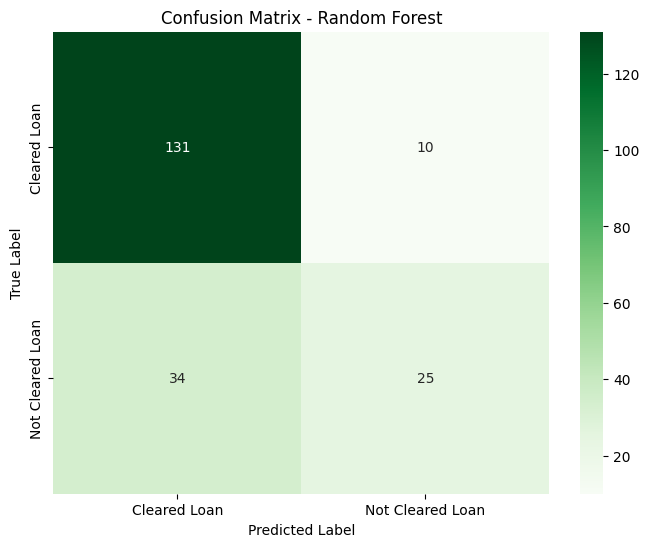

In [177]:
# Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Cleared Loan", "Not Cleared Loan"],
            yticklabels=["Cleared Loan", "Not Cleared Loan"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



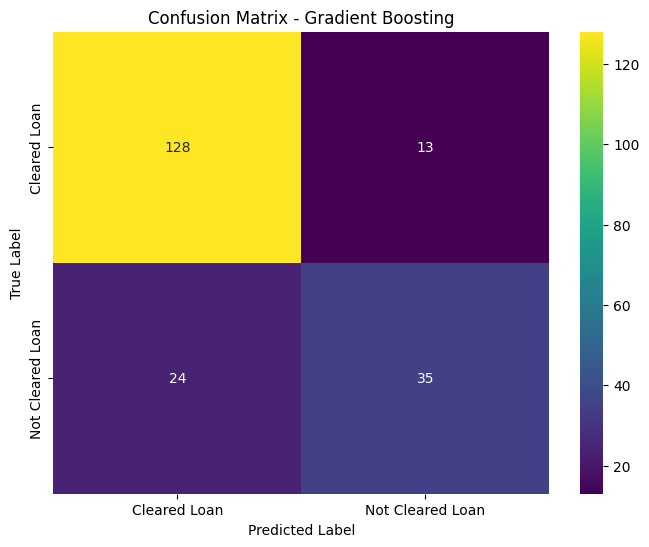

In [182]:
# Gradient Boosting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=["Cleared Loan", "Not Cleared Loan"],
            yticklabels=["Cleared Loan", "Not Cleared Loan"])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

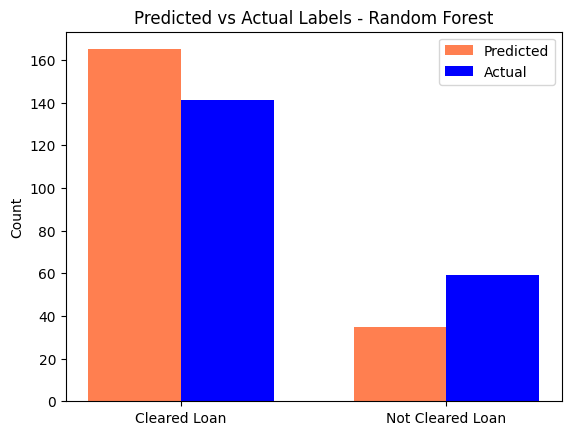

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique class labels from the true labels
class_labels = np.unique(test_y)

def plot_predictions_vs_actuals(predictions, actuals, model_name):
    predicted_counts = [np.sum(predictions == label) for label in class_labels]
    actual_counts = [np.sum(actuals == label) for label in class_labels]
    x_positions = np.arange(len(class_labels))
    bar_width = 0.35
    fig, ax = plt.subplots()
    ax.bar(x_positions - bar_width / 2, predicted_counts, bar_width, label='Predicted', color='coral')
    ax.bar(x_positions + bar_width / 2, actual_counts, bar_width, label='Actual', color='blue')
    ax.set_ylabel('Count')
    ax.set_title(f'Predicted vs Actual Labels - {model_name}')
    ax.set_xticks(x_positions)
    ax.set_xticklabels([get_default_label(label) for label in class_labels])
    ax.legend()
plot_predictions_vs_actuals(rf_predictions, test_y, "Random Forest")



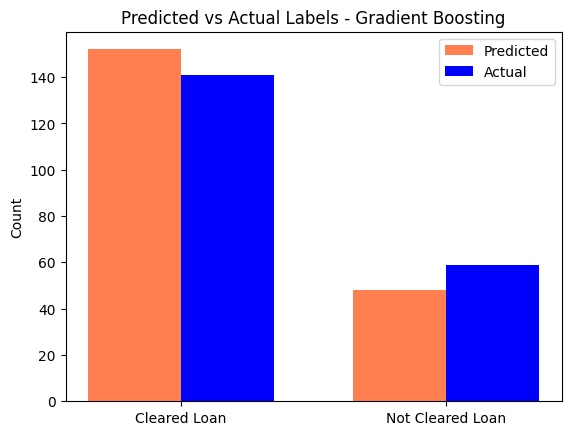

In [172]:
plot_predictions_vs_actuals(gb_predictions, test_y, "Gradient Boosting")